#### KULLANILACAK KÜTÜPHANELERİN İÇERİ AKTARILMASI-IMPORT SECTION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
from PIL import Image
import librosa.display
from sklearn.preprocessing import  LabelEncoder
import glob
import io
import seaborn as sns
import os,shutil
from pydub import AudioSegment
from pydub.utils import make_chunks
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

#### SES DOSYALARININ YOLLARI

In [3]:
blues_path = r'data\\genres_original\\blues'
classical_path = r'data\\genres_original\\classical'
country_path = r'data\\genres_original\\country'
disco_path = r'data\\genres_original\\disco'
hiphop_path = r'data\\genres_original\\hiphop'
jazz_path = r'data\\genres_original\\jazz'
metal_path = r'data\\genres_original\\metal'
pop_path = r'data\\genres_original\\pop'
reggae_path = r'data\\genres_original\\reggae'
rock_path = r'data\\genres_original\\rock'

blues_path_3s = r'data\\genres_3s\\blues'
classical_path_3s = r'data\\genres_3s\\classical'
country_path_3s = r'data\\genres_3s\\country'
disco_path_3s = r'data\\genres_3s\\disco'
hiphop_path_3s = r'data\\genres_3s\\hiphop'
jazz_path_3s = r'data\\genres_3s\\jazz'
metal_path_3s = r'data\\genres_3s\\metal'
pop_path_3s = r'data\\genres_3s\\pop'
reggae_path_3s = r'data\\genres_3s\\reggae'
rock_path_3s = r'data\\genres_3s\\rock'

In [4]:
def three_second_spiltter(paths):
    for path in paths:
        genre=path.split("\\")[-1]
        for filename in glob.glob(os.path.join(path,"*.wav")):
            audio=AudioSegment.from_file(filename,"wav")
            chunk_length_ms=3000
            chunks=make_chunks(audio,chunk_length_ms)
            audio_name="_".join(filename.split("\\")[-1].split(".")[0:2])
            for i, chunk in enumerate(chunks):
                if i==10:
                    break
                chunk_name="data\\genres_3s\\{}\\{}_chunk{}.wav".format(genre,audio_name,i)
                chunk.export(chunk_name,format="wav")

three_second_spiltter([blues_path,classical_path,country_path,disco_path,hiphop_path,jazz_path,metal_path,pop_path,reggae_path,rock_path])

#### TÜM SES DOSYALARININ TÜRLERİNE GÖRE AYRIŞTIRILMASI

In [56]:
def music_file_read(path):
    music_data=[]
    for filename in glob.glob(os.path.join(path,"*.wav")):
        (data,sr)=librosa.load(filename)
        data=np.array(data)
        music_data.append(data)
    music_data=np.array(music_data)
    return music_data,sr

blues,sr=music_file_read(blues_path_3s)
classical,sr=music_file_read(classical_path_3s)
country,sr=music_file_read(country_path_3s)
disco,sr=music_file_read(disco_path_3s)
hiphop,sr=music_file_read(hiphop_path_3s)
jazz,sr=music_file_read(jazz_path_3s)
metal,sr=music_file_read(metal_path_3s)
pop,sr=music_file_read(pop_path_3s)
reggae,sr=music_file_read(reggae_path_3s)
rock,sr=music_file_read(rock_path_3s)

<ipython-input-56-006adec3a43c>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  music_data=np.array(music_data)


In [6]:
len(jazz)

1000

In [7]:
len(jazz[42])

66150

## FEATURE EXTRACTION

Makine öğrenmesi algoritmasında kullanılacak feature(özelliklerin) oluşturulması.
* Mel Spektogram
* MFCC
* Delta ve Delta-Delta MFCC
* Spectral Roloff
* Chroma Feature
* Zero Crossing Rate
* Tempo
* Spectral Centroid
* Spectral Bandwidth
* RMS

### Mel Spektogram

* Spektrogram, belirli bir dalga formunda bulunan çeşitli frekanslarda bir sinyalin sinyal gücünü veya yüksekliğini temsil eden görseldir. Aynı zamanda enerji seviyelerini zaman içinde nasıl değiştiğini de gösterir.
* Short Time Fourier Transform: Ses sinyali işlemek için güçlü bir araçtır. Sinyaller için zamana ve frekansa göre karmaşık genliği belirten zaman frekansı dağılımını tanımlar.

In [19]:

jazz_spectrum=librosa.feature.melspectrogram(S = np.abs(librosa.stft((jazz[42])))**2)
print(jazz_spectrum)
print(jazz[42].shape)

[[6.80041360e-03 2.35102139e-03 1.10825012e-03 ... 1.53184496e-02
  9.80924964e-02 3.84181142e-01]
 [7.92329460e-02 5.59703000e-02 4.35933247e-02 ... 2.32051539e+00
  5.38123989e+00 4.04085732e+00]
 [7.56912351e-01 8.68665338e-01 1.05568326e+00 ... 1.42297573e+01
  2.09080830e+01 2.22209892e+01]
 ...
 [4.17765904e-07 1.08221833e-07 6.83449519e-09 ... 6.32122976e-09
  1.08002611e-08 4.20864765e-08]
 [4.57725633e-07 1.18724472e-07 5.84063331e-09 ... 6.95429048e-09
  1.09058451e-08 4.81111897e-08]
 [4.40020301e-07 1.13278936e-07 5.28227995e-09 ... 5.69942582e-09
  1.10836105e-08 5.38756311e-08]]
(66150,)


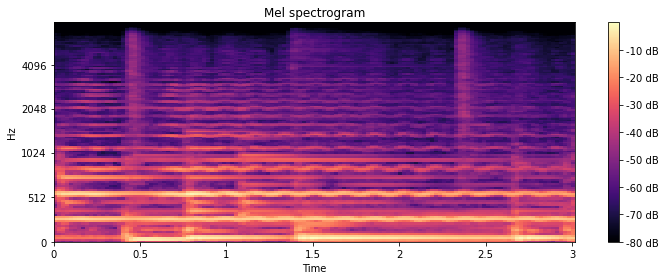

In [20]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(jazz_spectrum, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

#spektogramların scale edilmesi için desibel(db) cinsine dönüşüm yapılmıştır

In [10]:
Image(url= "https://www.researchgate.net/publication/335398843/figure/fig1/AS:796124961058818@1566822390492/MFCC-mel-frequency-cepstral-coefficients-characteristic-vectors-extraction-flow.png")

### MFCC(Mel Frequency Cepstral Coefficient) - Mel-Frekans Kepstral Katsayıları

Mel frekans ölçeği, insan kulağının ses frekanslarındaki değişimi algılayışını gösteren bir ölçektir. MFCC(Mel-Frequency Cepstral Coefficients), ses sinyalinin kısa zamanlı güç spektrumunun Mel ölçeği üzerindeki ifadesidir.

* Ses dosyalarını küçük parçalara bölünür(30 saniyelik dosya 20 milisaniyelik bir çok parçaya ayrılır)
* Her frame için power spektrum hesaplanır.
* Power spektrumlar mel filterbanktan geçirilir, çıktı toplanır.
* Tüm filterbank çıktılarının logaritması alınır.
* DCT(Discrete Cosine Trans.) uygulanır.

(13,)
[ 5.6956263  42.88015    -1.0913602   9.268794   -0.58808815  0.141522
  2.898235    7.5741086   2.109913    4.603239    5.388469    1.5484452
  1.7508683 ]


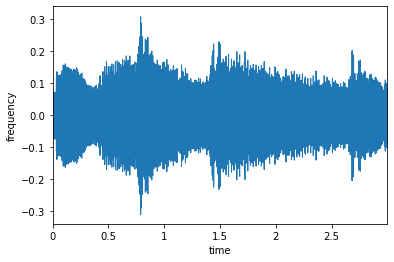

In [21]:
jazz_mfcc=np.mean(librosa.feature.mfcc(np.array(jazz_spectrum).flatten() , 22050 , n_mfcc = 13) , axis = 1)
print(jazz_mfcc.shape)
print(jazz_mfcc)
librosa.display.waveplot(jazz[42])
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

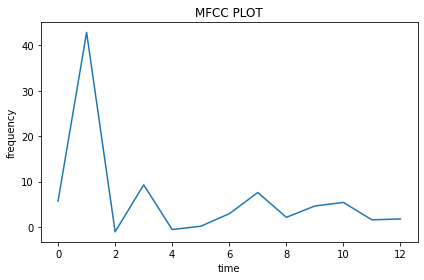

In [22]:
plt.plot(jazz_mfcc)
plt.xlabel('time')
plt.ylabel('frequency')
plt.title('MFCC PLOT')
plt.tight_layout()
plt.show()
# MFCC PLOT

### Delta ve Delta-Delta MFCC Hesaplanması

In [23]:
jazz_mfcc_delta=librosa.feature.delta(jazz_mfcc)
print(jazz_mfcc_delta)
print('shape of delta :' , jazz_mfcc_delta.shape)

jazz_mfcc_delta2=librosa.feature.delta(jazz_mfcc , order = 2)
print(jazz_mfcc_delta2)
print('shape of delta2 :' , jazz_mfcc_delta2.shape)

[-2.0234842  -2.0234842  -2.0234842  -2.0234842  -2.0234842  -2.3901145
  0.4125207  -0.08027685  0.25976992  0.25976992  0.25976992  0.25976992
  0.25976992]
shape of delta : (13,)
[ 0.8854249   0.8854249   0.8854249   0.8854249   0.8854249   2.5104299
  0.03488801  0.13399695 -0.58683807 -0.58683807 -0.58683807 -0.58683807
 -0.58683807]
shape of delta2 : (13,)


### Spectral Roloff

Sinyal şeklinin ölçüsü. Toplam spektral enerjisinin belli bir yüzdesini temsil eder.

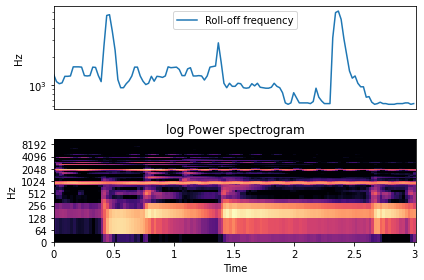

In [24]:
jazz_spectral_roloff=librosa.feature.spectral_rolloff(jazz[42],sr=22050)[0]
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(jazz_spectral_roloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, jazz_spectral_roloff.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(jazz_spectrum, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

### Chroma Feature

Spektrum müzikal oktavının 12 farklı yarı tonunu(chroma) temsil eden 12 parçanın belirtildiği ses için güçlü bir sunumudur.

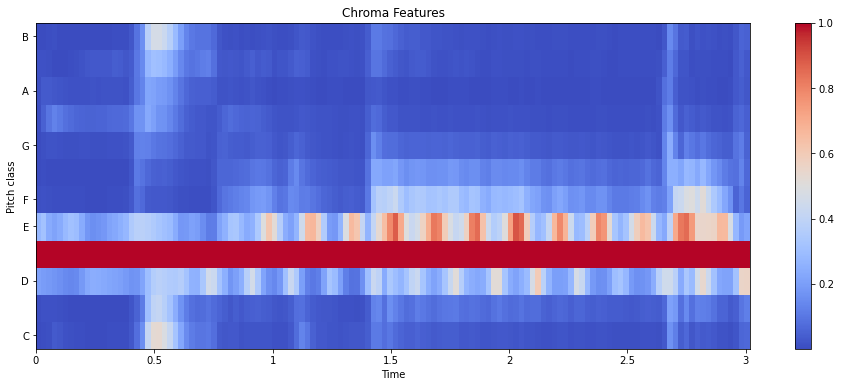

In [25]:
chroma=librosa.feature.chroma_stft(jazz[42],sr=22050)
plt.figure(figsize=(16,6))
librosa.display.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

### Zero Crossing Rate

Zero crossing rate bir sinyalin sıfır çizgisinden geçişi yani işaret değişiminin oranıdır.

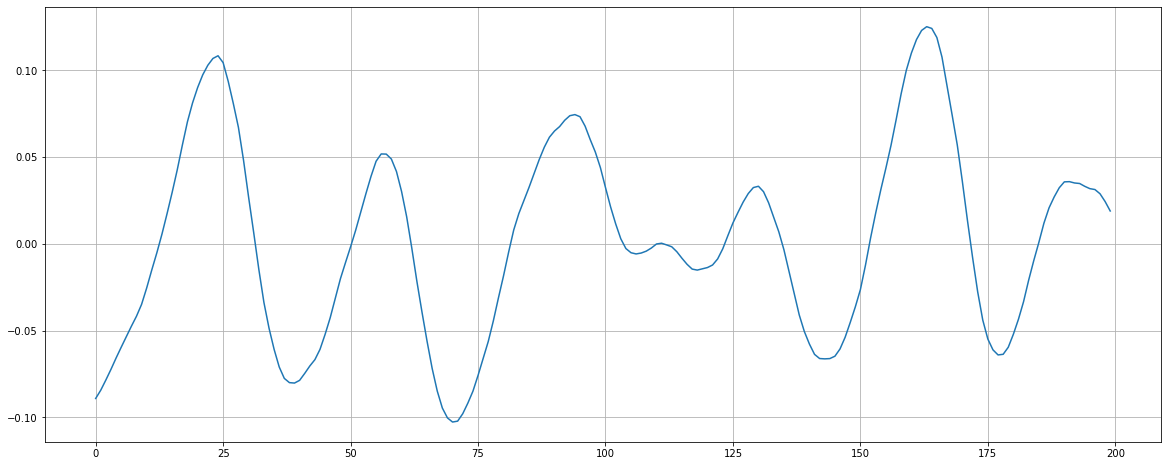

In [26]:
start=1000
end=1200
plt.figure(figsize=(20,8))
plt.plot(jazz[42][start:end])
plt.grid()

In [27]:
zero_crossing_rate=librosa.zero_crossings(jazz[42],pad=False)
print("Zero crossing sayısı: ",sum(zero_crossing_rate))

Zero crossing sayısı:  2075


### (Tempo) Ses Dosyalarının Ritim Özelliklerinin Hesaplanması

In [28]:
oenv_jazz = librosa.onset.onset_strength(y = jazz[42], sr= 22050, hop_length = 512)
jazz_tempo=librosa.beat.tempo(onset_envelope=oenv_jazz ,sr=22050,hop_length=512)[0]
print(oenv_jazz)
print(oenv_jazz.shape)
print(jazz_tempo)
print(jazz_tempo.shape)

[0.         0.         0.         2.7920148  1.0856211  0.78906167
 0.8488833  0.8855041  0.914294   0.86857706 1.3581879  1.2318271
 0.52794105 0.24159007 0.3938224  0.69150853 0.65199083 0.6669227
 1.1256523  3.7593267  5.368232   3.8495104  0.86142564 0.1821137
 0.15111627 0.23671365 0.4022669  0.6546063  1.0924706  1.2225397
 1.2597957  0.8358059  1.2179344  0.80296355 2.6927233  2.9389908
 1.4235659  0.46641627 0.24472614 0.7378539  0.54865164 0.3093212
 1.4121581  1.3081483  0.7876886  0.585783   0.9514555  1.77315
 1.934486   1.1374035  0.9757749  0.9347527  0.33111233 0.4549149
 0.8693434  0.63439906 0.3721966  0.91056395 1.3260849  0.70890236
 1.1680775  3.1910229  2.125058   0.80358434 0.5575354  0.8403677
 0.82354563 0.28331003 0.50688267 0.83406967 0.47603858 0.43530232
 1.1930876  1.3052037  0.5815803  0.603469   0.7802614  0.55951667
 0.42704102 0.75773454 1.330092   0.92962193 0.33442456 0.5764788
 0.521998   0.4882051  0.20943137 0.9284001  1.3480455  0.6503525
 0.30731

### Spectral Centroid

Spektrumun kütle merkezinin nerede olduğunu gösterir.

[Text(0.5, 1.0, 'log Power spectrogram')]

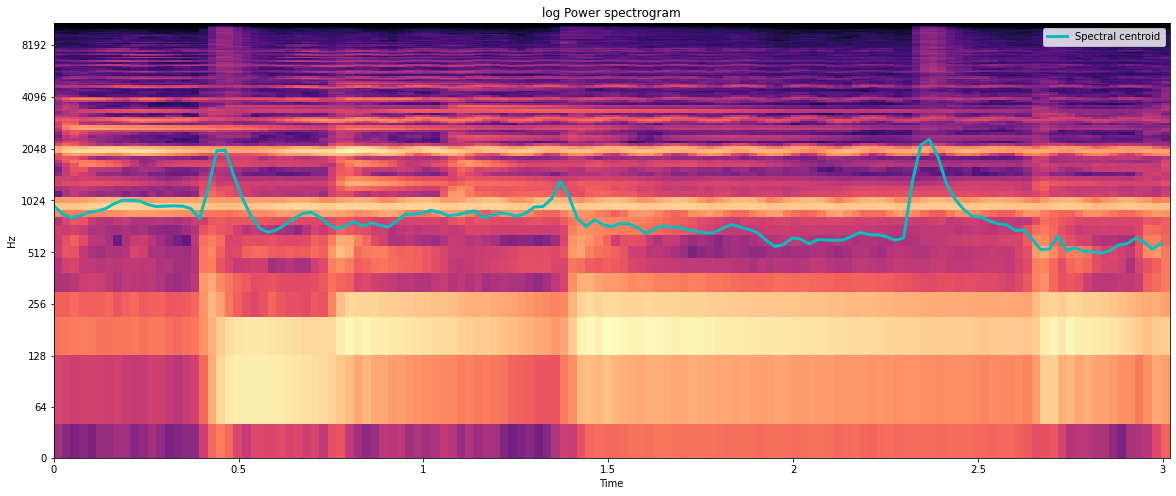

In [29]:
spectral_centroid = librosa.feature.spectral_centroid(y=jazz[42], sr=22050)
times = librosa.times_like(spectral_centroid)
fig, ax = plt.subplots(figsize=(20,8))
librosa.display.specshow(librosa.power_to_db(jazz_spectrum, ref=np.max),
                        y_axis='log', x_axis='time',fmax=8000, ax=ax)
ax.plot(times, spectral_centroid.T, label='Spectral centroid', color='c',linewidth=3)
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

### Spektral Bandwidth

Ses sinyalinin dalga genişliğinin maksimum tepe noktasının yarısını tanımlar.

[[1397.42758318 1084.82581041  954.83884389 1040.70943587 1108.29238768
  1139.44902692 1168.57611299 1241.39671978 1291.17816193 1274.22485398
  1229.13046971 1190.74028399 1205.90317858 1228.44324369 1226.24625009
  1244.68806305 1246.92564693 1320.69828545 2042.38019394 2657.33061107
  2648.38213054 2217.03469314 1856.71481587 1618.98650994 1412.70630435
  1297.01698172 1265.07740362 1273.78125915 1304.96508334 1332.62305091
  1343.61899371 1285.32863744 1182.63385086 1067.36548628 1082.62719521
  1109.92112828 1089.80546399 1129.19413112 1073.77623292 1052.04150683
  1177.77860221 1261.72870155 1312.02148332 1355.16641066 1358.8999281
  1292.73532391 1194.12084381 1183.31360699 1212.07040695 1238.2220641
  1157.07270641 1231.29503266 1256.50296484 1205.28545924 1162.69562249
  1200.374501   1293.90695318 1337.73630414 1537.04466087 1996.36905051
  1882.18214738 1612.90104024 1487.37272433 1529.05669709 1487.05654424
  1457.46322032 1467.61412272 1449.08588369 1402.66851872 1326.067

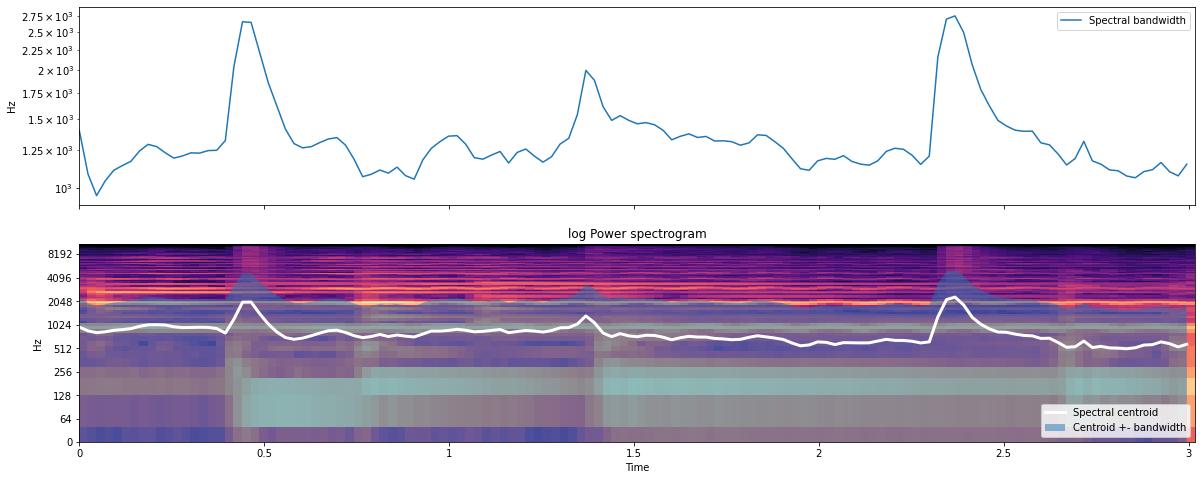

In [30]:
spec_bw=librosa.feature.spectral_bandwidth(jazz[42],sr=22050)
print(spec_bw,spec_bw.shape)
fig, ax = plt.subplots(nrows=2, sharex=True,figsize=(20,8))
times = librosa.times_like(spec_bw)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.power_to_db(jazz_spectrum, ref=np.max),
                        y_axis='log', x_axis='time',fmax=8000, ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, spectral_centroid[0] - spec_bw[0], spectral_centroid[0] + spec_bw[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, spectral_centroid[0], label='Spectral centroid', color='w',linewidth=3)
ax[1].legend(loc='lower right')

### RMS (Karekök Ortalaması)

[Text(0.5, 1.0, 'log Power spectrogram')]

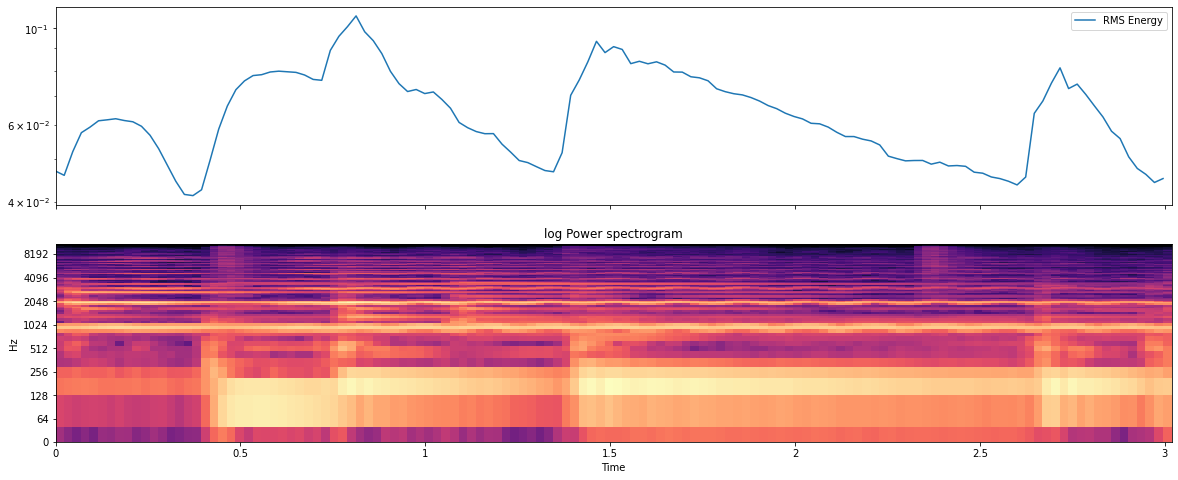

In [31]:
rms=librosa.feature.rms(y=jazz[42])
fig, ax = plt.subplots(nrows=2, sharex=True,figsize=(20,8))
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.power_to_db(jazz_spectrum, ref=np.max),
                        y_axis='log', x_axis='time',fmax=8000, ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [57]:
def feature_extraction(data):
    data_spectrum=[]
    data_mfcc=[]
    data_mfcc_delta=[]
    data_mfcc_delta2=[]
    data_spectral_roloff=[]
    data_chroma=[]
    data_zero_crossing_rate=[]
    data_tempo=[]
    data_spectral_centroid=[]
    data_spectral_bandwidth=[]
    data_rms=[]
    for i in range(len(data)):
        data_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(data[i]))**2))
        data_spectral_roloff.append(librosa.feature.spectral_rolloff(data[i],sr=22050)[0])
        data_chroma.append(librosa.feature.chroma_stft(data[i],sr=22050))
        data_zero_crossing_rate.append(librosa.zero_crossings(data[i],pad=False))
        oenv_data = librosa.onset.onset_strength(y = data[i], sr= 22050, hop_length = 512)
        data_tempo.append(librosa.beat.tempo(onset_envelope=oenv_data ,sr=22050,hop_length=512)[0])
        data_spectral_centroid.append(librosa.feature.spectral_centroid(y=data[i], sr=22050))
        data_spectral_bandwidth.append(librosa.feature.spectral_bandwidth(y=data[i], sr=22050))
        data_rms.append(librosa.feature.rms(y=data[i]))
        data_harmonic, data_percussive = librosa.effects.hpss(data[i])
    for i in range(len(data)):
        data_mfcc.append(np.mean(librosa.feature.mfcc(np.array(data_spectrum[i]).flatten() , 22050 , n_mfcc = 13) , axis = 1))
    for i in range(len(data)):
        data_mfcc_delta.append(librosa.feature.delta(data_mfcc[i]))
        data_mfcc_delta2.append(librosa.feature.delta(data_mfcc[i] , order = 2))

    return data_mfcc,data_mfcc_delta,data_mfcc_delta2,data_spectral_roloff,data_chroma,data_zero_crossing_rate,data_tempo,data_spectral_centroid,data_spectral_bandwidth,data_rms,data_harmonic,data_percussive

#Blues
blues_mfcc,blues_mfcc_delta,blues_mfcc_delta2,blues_spectral_roloff,blues_chroma,blues_zero_crossing_rate,\
blues_tempo,blues_spectral_centroid,blues_spectral_bandwidth,blues_rms,blues_harmonic,blues_percussive=feature_extraction(blues)

#Classical
classical_mfcc,classical_mfcc_delta,classical_mfcc_delta2,classical_spectral_roloff,classical_chroma,classical_zero_crossing_rate,\
classical_tempo,classical_spectral_centroid,classical_spectral_bandwidth,classical_rms,classical_harmonic,classical_percussive=feature_extraction(classical)

#Country
country_mfcc,country_mfcc_delta,country_mfcc_delta2,country_spectral_roloff,country_chroma,country_zero_crossing_rate,\
country_tempo,country_spectral_centroid,country_spectral_bandwidth,country_rms,country_harmonic,country_percussive=feature_extraction(country)

#Disco
disco_mfcc,disco_mfcc_delta,disco_mfcc_delta2,disco_spectral_roloff,disco_chroma,disco_zero_crossing_rate,\
disco_tempo,disco_spectral_centroid,disco_spectral_bandwidth,disco_rms,disco_harmonic,disco_percussive=feature_extraction(disco)

#Hiphop
hiphop_mfcc,hiphop_mfcc_delta,hiphop_mfcc_delta2,hiphop_spectral_roloff,hiphop_chroma,hiphop_zero_crossing_rate,\
hiphop_tempo,hiphop_spectral_centroid,hiphop_spectral_bandwidth,hiphop_rms,hiphop_harmonic,hiphop_percussive=feature_extraction(hiphop)

#Jazz
jazz_mfcc,jazz_mfcc_delta,jazz_mfcc_delta2,jazz_spectral_roloff,jazz_chroma,jazz_zero_crossing_rate,\
jazz_tempo,jazz_spectral_centroid,jazz_spectral_bandwidth,jazz_rms,jazz_harmonic,jazz_percussive=feature_extraction(jazz)

#Metal
metal_mfcc,metal_mfcc_delta,metal_mfcc_delta2,metal_spectral_roloff,metal_chroma,metal_zero_crossing_rate,\
metal_tempo,metal_spectral_centroid,metal_spectral_bandwidth,metal_rms,metal_harmonic,metal_percussive=feature_extraction(metal)

#Pop
pop_mfcc,pop_mfcc_delta,pop_mfcc_delta2,pop_spectral_roloff,pop_chroma,pop_zero_crossing_rate,\
pop_tempo,pop_spectral_centroid,pop_spectral_bandwidth,pop_rms,pop_harmonic,pop_percussive=feature_extraction(pop)

#Reggae
reggae_mfcc,reggae_mfcc_delta,reggae_mfcc_delta2,reggae_spectral_roloff,reggae_chroma,reggae_zero_crossing_rate,\
reggae_tempo,reggae_spectral_centroid,reggae_spectral_bandwidth,reggae_rms,reggae_harmonic,reggae_percussive=feature_extraction(reggae)

#Rock
rock_mfcc,rock_mfcc_delta,rock_mfcc_delta2,rock_spectral_roloff,rock_chroma,rock_zero_crossing_rate,\
rock_tempo,rock_spectral_centroid,rock_spectral_bandwidth,rock_rms,rock_harmonic,rock_percussive=feature_extraction(rock)

#### Saving Spectograms as Image

In [ ]:
def spectrogram_image(paths):
    window_size = 1024
    window = np.hanning(window_size)
    for path in paths:
        genre=path.split("\\")[-1]
        for i,filename in enumerate(glob.glob(os.path.join(path,"*.wav"))):
            audio_name="_".join(filename.split("\\")[-1].split(".")[0:2])
            print(audio_name)
            (data,sr)=librosa.load(filename)
            data=np.array(data)
            spectrum=librosa.feature.melspectrogram(S = np.abs(librosa.stft((data)))**2)
            fig, ax = plt.subplots()
            fig = plt.Figure()
            canvas = FigureCanvas(fig)
            ax = fig.add_subplot(111)
            p = librosa.display.specshow(librosa.power_to_db(spectrum,ref=np.max),ax=ax, y_axis='mel', fmax=8000, x_axis='time')
            with io.BytesIO() as memf:
                extent = ax.get_window_extent()
                extent = extent.transformed(fig.dpi_scale_trans.inverted())
                fig.savefig(memf, format='PNG', bbox_inches=extent)
                memf.seek(0)
                img = Image.open(memf).convert('RGB')
                arr = np.asarray(img)
                img.save('data\\genres_images\\{}\\{}_{}.png'.format(genre,audio_name,i))

spectrogram_image([blues_path,classical_path,country_path,disco_path,hiphop_path,jazz_path,metal_path,pop_path,reggae_path,rock_path])

#### Splitting Images to Train and Test

In [ ]:
rootdir="data\\genres_images"
classes = ['blues', 'classical', 'country','disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
for i in classes:
    os.makedirs(f'{rootdir}\\train\\{i}')
    os.makedirs(f'{rootdir}\\test\\{i}')
    source = f'{rootdir}\\{i}'
    allFileNames = os.listdir(source)
    np.random.shuffle(allFileNames)
    test_ratio = 0.25

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                            [int(len(allFileNames)* (1 - test_ratio))])
    train_FileNames = [source+'\\'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'\\' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
        shutil.copy(name, f'{rootdir}\\train\\{i}')

    for name in test_FileNames:
        shutil.copy(name, f'{rootdir}\\test\\{i}')

### PREPROCESSING

Oluşturalan featureların ortalama değerleri, varyansları, medyanları, max ve min değerleri hesaplanıp veri setinin oluşturulması.

In [58]:
def statistical_features(data):
    mean_value=[]
    var_value=[]
    med_value=[]
    _max=[]
    _min=[]
    for data_arrays in (data):
        mean_value.append(np.mean(data_arrays))
        var_value.append(np.var(data_arrays))
        med_value.append(np.median(data_arrays))
        _max.append(np.max(data_arrays))
        _min.append(np.min(data_arrays))
    return mean_value,var_value,med_value,_max,_min

#Blues
blues_mfcc_mean,blues_mfcc_var,blues_mfcc_median,blues_mfcc_max,blues_mfcc_min,=statistical_features(blues_mfcc)
blues_mfcc_delta_mean,blues_mfcc_delta_var,blues_mfcc_delta_median,blues_mfcc_delta_max,blues_mfcc_delta_min=statistical_features(blues_mfcc_delta)
blues_mfcc_delta2_mean,blues_mfcc_delta2_var,blues_mfcc_delta2_median,blues_mfcc_delta2_max,blues_mfcc_delta2_min=statistical_features(blues_mfcc_delta2)
blues_spectral_roloff_mean,blues_spectral_roloff_var,blues_spectral_roloff_median,blues_spectral_roloff_max,blues_spectral_roloff_min=statistical_features(blues_spectral_roloff)
blues_chroma_mean,blues_chroma_var,blues_chroma_median,_,_=statistical_features(blues_chroma)
blues_zero_crossing_rate_mean,blues_zero_crossing_rate_var,_,_,_=statistical_features(blues_zero_crossing_rate)
blues_spectral_centroid_mean,blues_spectral_centroid_var,blues_spectral_centroid_median,blues_spectral_centroid_max,blues_spectral_centroid_min=statistical_features(blues_spectral_centroid)
blues_spectral_bandwidth_mean,blues_spectral_bandwidth_var,blues_spectral_bandwidth_median,blues_spectral_bandwidth_max,blues_spectral_bandwidth_min=statistical_features(blues_spectral_bandwidth)
blues_rms_mean,blues_rms_var,blues_rms_median,blues_rms_max,blues_rms_min=statistical_features(blues_rms)
blues_harmonic_mean,blues_harmonic_var,blues_harmonic_median,blues_harmonic_max,blues_harmonic_min = statistical_features(blues_harmonic)
blues_percussive_mean,blues_percussive_var,blues_percussive_median,blues_percussive_max,blues_percussive_min = statistical_features(blues_percussive)


#Classical
classical_mfcc_mean,classical_mfcc_var,classical_mfcc_median,classical_mfcc_max,classical_mfcc_min,=statistical_features(classical_mfcc)
classical_mfcc_delta_mean,classical_mfcc_delta_var,classical_mfcc_delta_median,classical_mfcc_delta_max,classical_mfcc_delta_min=statistical_features(classical_mfcc_delta)
classical_mfcc_delta2_mean,classical_mfcc_delta2_var,classical_mfcc_delta2_median,classical_mfcc_delta2_max,classical_mfcc_delta2_min=statistical_features(classical_mfcc_delta2)
classical_spectral_roloff_mean,classical_spectral_roloff_var,classical_spectral_roloff_median,classical_spectral_roloff_max,classical_spectral_roloff_min=statistical_features(classical_spectral_roloff)
classical_chroma_mean,classical_chroma_var,classical_chroma_median,_,_=statistical_features(classical_chroma)
classical_zero_crossing_rate_mean,classical_zero_crossing_rate_var,_,_,_=statistical_features(classical_zero_crossing_rate)
classical_spectral_centroid_mean,classical_spectral_centroid_var,classical_spectral_centroid_median,classical_spectral_centroid_max,classical_spectral_centroid_min=statistical_features(classical_spectral_centroid)
classical_spectral_bandwidth_mean,classical_spectral_bandwidth_var,classical_spectral_bandwidth_median,classical_spectral_bandwidth_max,classical_spectral_bandwidth_min=statistical_features(classical_spectral_bandwidth)
classical_rms_mean,classical_rms_var,classical_rms_median,classical_rms_max,classical_rms_min=statistical_features(classical_rms)
classical_harmonic_mean,classical_harmonic_var,classical_harmonic_median,classical_harmonic_max,classical_harmonic_min = statistical_features(classical_harmonic)
classical_percussive_mean,classical_percussive_var,classical_percussive_median,classical_percussive_max,classical_percussive_min = statistical_features(classical_percussive)

#Country
country_mfcc_mean,country_mfcc_var,country_mfcc_median,country_mfcc_max,country_mfcc_min,=statistical_features(country_mfcc)
country_mfcc_delta_mean,country_mfcc_delta_var,country_mfcc_delta_median,country_mfcc_delta_max,country_mfcc_delta_min=statistical_features(country_mfcc_delta)
country_mfcc_delta2_mean,country_mfcc_delta2_var,country_mfcc_delta2_median,country_mfcc_delta2_max,country_mfcc_delta2_min=statistical_features(country_mfcc_delta2)
country_spectral_roloff_mean,country_spectral_roloff_var,country_spectral_roloff_median,country_spectral_roloff_max,country_spectral_roloff_min=statistical_features(country_spectral_roloff)
country_chroma_mean,country_chroma_var,country_chroma_median,_,_=statistical_features(country_chroma)
country_zero_crossing_rate_mean,country_zero_crossing_rate_var,_,_,_=statistical_features(country_zero_crossing_rate)
country_spectral_centroid_mean,country_spectral_centroid_var,country_spectral_centroid_median,country_spectral_centroid_max,country_spectral_centroid_min=statistical_features(country_spectral_centroid)
country_spectral_bandwidth_mean,country_spectral_bandwidth_var,country_spectral_bandwidth_median,country_spectral_bandwidth_max,country_spectral_bandwidth_min=statistical_features(country_spectral_bandwidth)
country_rms_mean,country_rms_var,country_rms_median,country_rms_max,country_rms_min=statistical_features(country_rms)
country_harmonic_mean,country_harmonic_var,country_harmonic_median,country_harmonic_max,country_harmonic_min = statistical_features(country_harmonic)
country_percussive_mean,country_percussive_var,country_percussive_median,country_percussive_max,country_percussive_min = statistical_features(country_percussive)

#Disco
disco_mfcc_mean,disco_mfcc_var,disco_mfcc_median,disco_mfcc_max,disco_mfcc_min,=statistical_features(disco_mfcc)
disco_mfcc_delta_mean,disco_mfcc_delta_var,disco_mfcc_delta_median,disco_mfcc_delta_max,disco_mfcc_delta_min=statistical_features(disco_mfcc_delta)
disco_mfcc_delta2_mean,disco_mfcc_delta2_var,disco_mfcc_delta2_median,disco_mfcc_delta2_max,disco_mfcc_delta2_min=statistical_features(disco_mfcc_delta2)
disco_spectral_roloff_mean,disco_spectral_roloff_var,disco_spectral_roloff_median,disco_spectral_roloff_max,disco_spectral_roloff_min=statistical_features(disco_spectral_roloff)
disco_chroma_mean,disco_chroma_var,disco_chroma_median,_,_=statistical_features(disco_chroma)
disco_zero_crossing_rate_mean,disco_zero_crossing_rate_var,_,_,_=statistical_features(disco_zero_crossing_rate)
disco_spectral_centroid_mean,disco_spectral_centroid_var,disco_spectral_centroid_median,disco_spectral_centroid_max,disco_spectral_centroid_min=statistical_features(disco_spectral_centroid)
disco_spectral_bandwidth_mean,disco_spectral_bandwidth_var,disco_spectral_bandwidth_median,disco_spectral_bandwidth_max,disco_spectral_bandwidth_min=statistical_features(disco_spectral_bandwidth)
disco_rms_mean,disco_rms_var,disco_rms_median,disco_rms_max,disco_rms_min=statistical_features(disco_rms)
disco_harmonic_mean,disco_harmonic_var,disco_harmonic_median,disco_harmonic_max,disco_harmonic_min = statistical_features(disco_harmonic)
disco_percussive_mean,disco_percussive_var,disco_percussive_median,disco_percussive_max,disco_percussive_min = statistical_features(disco_percussive)

#Hiphop
hiphop_mfcc_mean,hiphop_mfcc_var,hiphop_mfcc_median,hiphop_mfcc_max,hiphop_mfcc_min,=statistical_features(hiphop_mfcc)
hiphop_mfcc_delta_mean,hiphop_mfcc_delta_var,hiphop_mfcc_delta_median,hiphop_mfcc_delta_max,hiphop_mfcc_delta_min=statistical_features(hiphop_mfcc_delta)
hiphop_mfcc_delta2_mean,hiphop_mfcc_delta2_var,hiphop_mfcc_delta2_median,hiphop_mfcc_delta2_max,hiphop_mfcc_delta2_min=statistical_features(hiphop_mfcc_delta2)
hiphop_spectral_roloff_mean,hiphop_spectral_roloff_var,hiphop_spectral_roloff_median,hiphop_spectral_roloff_max,hiphop_spectral_roloff_min=statistical_features(hiphop_spectral_roloff)
hiphop_chroma_mean,hiphop_chroma_var,hiphop_chroma_median,_,_=statistical_features(hiphop_chroma)
hiphop_zero_crossing_rate_mean,hiphop_zero_crossing_rate_var,_,_,_=statistical_features(hiphop_zero_crossing_rate)
hiphop_spectral_centroid_mean,hiphop_spectral_centroid_var,hiphop_spectral_centroid_median,hiphop_spectral_centroid_max,hiphop_spectral_centroid_min=statistical_features(hiphop_spectral_centroid)
hiphop_spectral_bandwidth_mean,hiphop_spectral_bandwidth_var,hiphop_spectral_bandwidth_median,hiphop_spectral_bandwidth_max,hiphop_spectral_bandwidth_min=statistical_features(hiphop_spectral_bandwidth)
hiphop_rms_mean,hiphop_rms_var,hiphop_rms_median,hiphop_rms_max,hiphop_rms_min=statistical_features(hiphop_rms)
hiphop_harmonic_mean,hiphop_harmonic_var,hiphop_harmonic_median,hiphop_harmonic_max,hiphop_harmonic_min = statistical_features(hiphop_harmonic)
hiphop_percussive_mean,hiphop_percussive_var,hiphop_percussive_median,hiphop_percussive_max,hiphop_percussive_min = statistical_features(hiphop_percussive)

#Jazz
jazz_mfcc_mean,jazz_mfcc_var,jazz_mfcc_median,jazz_mfcc_max,jazz_mfcc_min,=statistical_features(jazz_mfcc)
jazz_mfcc_delta_mean,jazz_mfcc_delta_var,jazz_mfcc_delta_median,jazz_mfcc_delta_max,jazz_mfcc_delta_min=statistical_features(jazz_mfcc_delta)
jazz_mfcc_delta2_mean,jazz_mfcc_delta2_var,jazz_mfcc_delta2_median,jazz_mfcc_delta2_max,jazz_mfcc_delta2_min=statistical_features(jazz_mfcc_delta2)
jazz_spectral_roloff_mean,jazz_spectral_roloff_var,jazz_spectral_roloff_median,jazz_spectral_roloff_max,jazz_spectral_roloff_min=statistical_features(jazz_spectral_roloff)
jazz_chroma_mean,jazz_chroma_var,jazz_chroma_median,_,_=statistical_features(jazz_chroma)
jazz_zero_crossing_rate_mean,jazz_zero_crossing_rate_var,_,_,_=statistical_features(jazz_zero_crossing_rate)
jazz_spectral_centroid_mean,jazz_spectral_centroid_var,jazz_spectral_centroid_median,jazz_spectral_centroid_max,jazz_spectral_centroid_min=statistical_features(jazz_spectral_centroid)
jazz_spectral_bandwidth_mean,jazz_spectral_bandwidth_var,jazz_spectral_bandwidth_median,jazz_spectral_bandwidth_max,jazz_spectral_bandwidth_min=statistical_features(jazz_spectral_bandwidth)
jazz_rms_mean,jazz_rms_var,jazz_rms_median,jazz_rms_max,jazz_rms_min=statistical_features(jazz_rms)
jazz_harmonic_mean,jazz_harmonic_var,jazz_harmonic_median,jazz_harmonic_max,jazz_harmonic_min = statistical_features(jazz_harmonic)
jazz_percussive_mean,jazz_percussive_var,jazz_percussive_median,jazz_percussive_max,jazz_percussive_min = statistical_features(jazz_percussive)

#Metal
metal_mfcc_mean,metal_mfcc_var,metal_mfcc_median,metal_mfcc_max,metal_mfcc_min,=statistical_features(metal_mfcc)
metal_mfcc_delta_mean,metal_mfcc_delta_var,metal_mfcc_delta_median,metal_mfcc_delta_max,metal_mfcc_delta_min=statistical_features(metal_mfcc_delta)
metal_mfcc_delta2_mean,metal_mfcc_delta2_var,metal_mfcc_delta2_median,metal_mfcc_delta2_max,metal_mfcc_delta2_min=statistical_features(metal_mfcc_delta2)
metal_spectral_roloff_mean,metal_spectral_roloff_var,metal_spectral_roloff_median,metal_spectral_roloff_max,metal_spectral_roloff_min=statistical_features(metal_spectral_roloff)
metal_chroma_mean,metal_chroma_var,metal_chroma_median,_,_=statistical_features(metal_chroma)
metal_zero_crossing_rate_mean,metal_zero_crossing_rate_var,_,_,_=statistical_features(metal_zero_crossing_rate)
metal_spectral_centroid_mean,metal_spectral_centroid_var,metal_spectral_centroid_median,metal_spectral_centroid_max,metal_spectral_centroid_min=statistical_features(metal_spectral_centroid)
metal_spectral_bandwidth_mean,metal_spectral_bandwidth_var,metal_spectral_bandwidth_median,metal_spectral_bandwidth_max,metal_spectral_bandwidth_min=statistical_features(metal_spectral_bandwidth)
metal_rms_mean,metal_rms_var,metal_rms_median,metal_rms_max,metal_rms_min=statistical_features(metal_rms)
metal_harmonic_mean,metal_harmonic_var,metal_harmonic_median,metal_harmonic_max,metal_harmonic_min = statistical_features(metal_harmonic)
metal_percussive_mean,metal_percussive_var,metal_percussive_median,metal_percussive_max,metal_percussive_min = statistical_features(metal_percussive)

#Pop
pop_mfcc_mean,pop_mfcc_var,pop_mfcc_median,pop_mfcc_max,pop_mfcc_min,=statistical_features(pop_mfcc)
pop_mfcc_delta_mean,pop_mfcc_delta_var,pop_mfcc_delta_median,pop_mfcc_delta_max,pop_mfcc_delta_min=statistical_features(pop_mfcc_delta)
pop_mfcc_delta2_mean,pop_mfcc_delta2_var,pop_mfcc_delta2_median,pop_mfcc_delta2_max,pop_mfcc_delta2_min=statistical_features(pop_mfcc_delta2)
pop_spectral_roloff_mean,pop_spectral_roloff_var,pop_spectral_roloff_median,pop_spectral_roloff_max,pop_spectral_roloff_min=statistical_features(pop_spectral_roloff)
pop_chroma_mean,pop_chroma_var,pop_chroma_median,_,_=statistical_features(pop_chroma)
pop_zero_crossing_rate_mean,pop_zero_crossing_rate_var,_,_,_=statistical_features(pop_zero_crossing_rate)
pop_spectral_centroid_mean,pop_spectral_centroid_var,pop_spectral_centroid_median,pop_spectral_centroid_max,pop_spectral_centroid_min=statistical_features(pop_spectral_centroid)
pop_spectral_bandwidth_mean,pop_spectral_bandwidth_var,pop_spectral_bandwidth_median,pop_spectral_bandwidth_max,pop_spectral_bandwidth_min=statistical_features(pop_spectral_bandwidth)
pop_rms_mean,pop_rms_var,pop_rms_median,pop_rms_max,pop_rms_min=statistical_features(pop_rms)
pop_harmonic_mean,pop_harmonic_var,pop_harmonic_median,pop_harmonic_max,pop_harmonic_min = statistical_features(pop_harmonic)
pop_percussive_mean,pop_percussive_var,pop_percussive_median,pop_percussive_max,pop_percussive_min = statistical_features(pop_percussive)

#Reggae
reggae_mfcc_mean,reggae_mfcc_var,reggae_mfcc_median,reggae_mfcc_max,reggae_mfcc_min,=statistical_features(reggae_mfcc)
reggae_mfcc_delta_mean,reggae_mfcc_delta_var,reggae_mfcc_delta_median,reggae_mfcc_delta_max,reggae_mfcc_delta_min=statistical_features(reggae_mfcc_delta)
reggae_mfcc_delta2_mean,reggae_mfcc_delta2_var,reggae_mfcc_delta2_median,reggae_mfcc_delta2_max,reggae_mfcc_delta2_min=statistical_features(reggae_mfcc_delta2)
reggae_spectral_roloff_mean,reggae_spectral_roloff_var,reggae_spectral_roloff_median,reggae_spectral_roloff_max,reggae_spectral_roloff_min=statistical_features(reggae_spectral_roloff)
reggae_chroma_mean,reggae_chroma_var,reggae_chroma_median,_,_=statistical_features(reggae_chroma)
reggae_zero_crossing_rate_mean,reggae_zero_crossing_rate_var,_,_,_=statistical_features(reggae_zero_crossing_rate)
reggae_spectral_centroid_mean,reggae_spectral_centroid_var,reggae_spectral_centroid_median,reggae_spectral_centroid_max,reggae_spectral_centroid_min=statistical_features(reggae_spectral_centroid)
reggae_spectral_bandwidth_mean,reggae_spectral_bandwidth_var,reggae_spectral_bandwidth_median,reggae_spectral_bandwidth_max,reggae_spectral_bandwidth_min=statistical_features(reggae_spectral_bandwidth)
reggae_rms_mean,reggae_rms_var,reggae_rms_median,reggae_rms_max,reggae_rms_min=statistical_features(reggae_rms)
reggae_harmonic_mean,reggae_harmonic_var,reggae_harmonic_median,reggae_harmonic_max,reggae_harmonic_min = statistical_features(reggae_harmonic)
reggae_percussive_mean,reggae_percussive_var,reggae_percussive_median,reggae_percussive_max,reggae_percussive_min = statistical_features(reggae_percussive)

#Rock
rock_mfcc_mean,rock_mfcc_var,rock_mfcc_median,rock_mfcc_max,rock_mfcc_min,=statistical_features(rock_mfcc)
rock_mfcc_delta_mean,rock_mfcc_delta_var,rock_mfcc_delta_median,rock_mfcc_delta_max,rock_mfcc_delta_min=statistical_features(rock_mfcc_delta)
rock_mfcc_delta2_mean,rock_mfcc_delta2_var,rock_mfcc_delta2_median,rock_mfcc_delta2_max,rock_mfcc_delta2_min=statistical_features(rock_mfcc_delta2)
rock_spectral_roloff_mean,rock_spectral_roloff_var,rock_spectral_roloff_median,rock_spectral_roloff_max,rock_spectral_roloff_min=statistical_features(rock_spectral_roloff)
rock_chroma_mean,rock_chroma_var,rock_chroma_median,_,_=statistical_features(rock_chroma)
rock_zero_crossing_rate_mean,rock_zero_crossing_rate_var,_,_,_=statistical_features(rock_zero_crossing_rate)
rock_spectral_centroid_mean,rock_spectral_centroid_var,rock_spectral_centroid_median,rock_spectral_centroid_max,rock_spectral_centroid_min=statistical_features(rock_spectral_centroid)
rock_spectral_bandwidth_mean,rock_spectral_bandwidth_var,rock_spectral_bandwidth_median,rock_spectral_bandwidth_max,rock_spectral_bandwidth_min=statistical_features(rock_spectral_bandwidth)
rock_rms_mean,rock_rms_var,rock_rms_median,rock_rms_max,rock_rms_min=statistical_features(rock_rms)
rock_harmonic_mean,rock_harmonic_var,rock_harmonic_median,rock_harmonic_max,rock_harmonic_min = statistical_features(rock_harmonic)
rock_percussive_mean,rock_percussive_var,rock_percussive_median,rock_percussive_max,rock_percussive_min = statistical_features(rock_percussive)

In [59]:
columns=[
"mfcc_mean","mfcc_var","mfcc_median","mfcc_max","mfcc_min",
"mfcc_delta_mean","mfcc_delta_var","mfcc_delta_median","mfcc_delta_max","mfcc_delta_min",
"mfcc_delta2_mean","mfcc_delta2_var","mfcc_delta2_median","mfcc_delta2_max","mfcc_delta2_min",
"spectral_roloff_mean","spectral_roloff_var","spectral_roloff_median","spectral_roloff_max","spectral_roloff_min",
"chroma_mean","chroma_var","chroma_median",
"zero_crossing_rate_mean","zero_crossing_rate_var",
"spectral_centroid_mean","spectral_centroid_var","spectral_centroid_median","spectral_centroid_max","spectral_centroid_min",
"spectral_bandwidth_mean","spectral_bandwidth_var","spectral_bandwidth_median","spectral_bandwidth_max","spectral_bandwidth_min",
"rms_mean","rms_var","rms_median","rms_max","rms_min",
"harmonic_mean","harmonic_var","harmonic_median","harmonic_max","harmonic_min",
"percussive_mean","percussive_var","percussive_median","percussive_max","percussive_min"]

In [60]:
blues_data = pd.DataFrame(list(map(list, zip(
        blues_mfcc_mean,blues_mfcc_var,blues_mfcc_median,blues_mfcc_max,blues_mfcc_min,
        blues_mfcc_delta_mean,blues_mfcc_delta_var,blues_mfcc_delta_median,blues_mfcc_delta_max,blues_mfcc_delta_min,
        blues_mfcc_delta2_mean,blues_mfcc_delta2_var,blues_mfcc_delta2_median,blues_mfcc_delta2_max,blues_mfcc_delta2_min,
        blues_spectral_roloff_mean,blues_spectral_roloff_var,blues_spectral_roloff_median,blues_spectral_roloff_max,blues_spectral_roloff_min,
        blues_chroma_mean,blues_chroma_var,blues_chroma_median,
        blues_zero_crossing_rate_mean,blues_zero_crossing_rate_var,
        blues_spectral_centroid_mean,blues_spectral_centroid_var,blues_spectral_centroid_median,blues_spectral_centroid_max,blues_spectral_centroid_min,
        blues_spectral_bandwidth_mean,blues_spectral_bandwidth_var,blues_spectral_bandwidth_median,blues_spectral_bandwidth_max,blues_spectral_bandwidth_min,
        blues_rms_mean,blues_rms_var,blues_rms_median,blues_rms_max,blues_rms_min,
        blues_harmonic_mean,blues_harmonic_var,blues_harmonic_median,blues_harmonic_max,blues_harmonic_min,
        blues_percussive_mean,blues_percussive_var,blues_percussive_median,blues_percussive_max,blues_percussive_min
))),columns=columns)

classical_data = pd.DataFrame(list(map(list, zip(
        classical_mfcc_mean,classical_mfcc_var,classical_mfcc_median,classical_mfcc_max,classical_mfcc_min,
        classical_mfcc_delta_mean,classical_mfcc_delta_var,classical_mfcc_delta_median,classical_mfcc_delta_max,classical_mfcc_delta_min,
        classical_mfcc_delta2_mean,classical_mfcc_delta2_var,classical_mfcc_delta2_median,classical_mfcc_delta2_max,classical_mfcc_delta2_min,
        classical_spectral_roloff_mean,classical_spectral_roloff_var,classical_spectral_roloff_median,classical_spectral_roloff_max,classical_spectral_roloff_min,
        classical_chroma_mean,classical_chroma_var,classical_chroma_median,
        classical_zero_crossing_rate_mean,classical_zero_crossing_rate_var,
        classical_spectral_centroid_mean,classical_spectral_centroid_var,classical_spectral_centroid_median,classical_spectral_centroid_max,classical_spectral_centroid_min,
        classical_spectral_bandwidth_mean,classical_spectral_bandwidth_var,classical_spectral_bandwidth_median,classical_spectral_bandwidth_max,classical_spectral_bandwidth_min,
        classical_rms_mean,classical_rms_var,classical_rms_median,classical_rms_max,classical_rms_min,
        classical_harmonic_mean,classical_harmonic_var,classical_harmonic_median,classical_harmonic_max,classical_harmonic_min,
        classical_percussive_mean,classical_percussive_var,classical_percussive_median,classical_percussive_max,classical_percussive_min
))),columns=columns)

country_data = pd.DataFrame(list(map(list, zip(
        country_mfcc_mean,country_mfcc_var,country_mfcc_median,country_mfcc_max,country_mfcc_min,
        country_mfcc_delta_mean,country_mfcc_delta_var,country_mfcc_delta_median,country_mfcc_delta_max,country_mfcc_delta_min,
        country_mfcc_delta2_mean,country_mfcc_delta2_var,country_mfcc_delta2_median,country_mfcc_delta2_max,country_mfcc_delta2_min,
        country_spectral_roloff_mean,country_spectral_roloff_var,country_spectral_roloff_median,country_spectral_roloff_max,country_spectral_roloff_min,
        country_chroma_mean,country_chroma_var,country_chroma_median,
        country_zero_crossing_rate_mean,country_zero_crossing_rate_var,
        country_spectral_centroid_mean,country_spectral_centroid_var,country_spectral_centroid_median,country_spectral_centroid_max,country_spectral_centroid_min,
        country_spectral_bandwidth_mean,country_spectral_bandwidth_var,country_spectral_bandwidth_median,country_spectral_bandwidth_max,country_spectral_bandwidth_min,
        country_rms_mean,country_rms_var,country_rms_median,country_rms_max,country_rms_min,
        country_harmonic_mean,country_harmonic_var,country_harmonic_median,country_harmonic_max,country_harmonic_min,
        country_percussive_mean,country_percussive_var,country_percussive_median,country_percussive_max,country_percussive_min
))),columns=columns)

disco_data = pd.DataFrame(list(map(list, zip(
        disco_mfcc_mean,disco_mfcc_var,disco_mfcc_median,disco_mfcc_max,disco_mfcc_min,
        disco_mfcc_delta_mean,disco_mfcc_delta_var,disco_mfcc_delta_median,disco_mfcc_delta_max,disco_mfcc_delta_min,
        disco_mfcc_delta2_mean,disco_mfcc_delta2_var,disco_mfcc_delta2_median,disco_mfcc_delta2_max,disco_mfcc_delta2_min,
        disco_spectral_roloff_mean,disco_spectral_roloff_var,disco_spectral_roloff_median,disco_spectral_roloff_max,disco_spectral_roloff_min,
        disco_chroma_mean,disco_chroma_var,disco_chroma_median,
        disco_zero_crossing_rate_mean,disco_zero_crossing_rate_var,
        disco_spectral_centroid_mean,disco_spectral_centroid_var,disco_spectral_centroid_median,disco_spectral_centroid_max,disco_spectral_centroid_min,
        disco_spectral_bandwidth_mean,disco_spectral_bandwidth_var,disco_spectral_bandwidth_median,disco_spectral_bandwidth_max,disco_spectral_bandwidth_min,
        disco_rms_mean,disco_rms_var,disco_rms_median,disco_rms_max,disco_rms_min,
        disco_harmonic_mean,disco_harmonic_var,disco_harmonic_median,disco_harmonic_max,disco_harmonic_min,
        disco_percussive_mean,disco_percussive_var,disco_percussive_median,disco_percussive_max,disco_percussive_min
))),columns=columns)

hiphop_data = pd.DataFrame(list(map(list, zip(
        hiphop_mfcc_mean,hiphop_mfcc_var,hiphop_mfcc_median,hiphop_mfcc_max,hiphop_mfcc_min,
        hiphop_mfcc_delta_mean,hiphop_mfcc_delta_var,hiphop_mfcc_delta_median,hiphop_mfcc_delta_max,hiphop_mfcc_delta_min,
        hiphop_mfcc_delta2_mean,hiphop_mfcc_delta2_var,hiphop_mfcc_delta2_median,hiphop_mfcc_delta2_max,hiphop_mfcc_delta2_min,
        hiphop_spectral_roloff_mean,hiphop_spectral_roloff_var,hiphop_spectral_roloff_median,hiphop_spectral_roloff_max,hiphop_spectral_roloff_min,
        hiphop_chroma_mean,hiphop_chroma_var,hiphop_chroma_median,
        hiphop_zero_crossing_rate_mean,hiphop_zero_crossing_rate_var,
        hiphop_spectral_centroid_mean,hiphop_spectral_centroid_var,hiphop_spectral_centroid_median,hiphop_spectral_centroid_max,hiphop_spectral_centroid_min,
        hiphop_spectral_bandwidth_mean,hiphop_spectral_bandwidth_var,hiphop_spectral_bandwidth_median,hiphop_spectral_bandwidth_max,hiphop_spectral_bandwidth_min,
        hiphop_rms_mean,hiphop_rms_var,hiphop_rms_median,hiphop_rms_max,hiphop_rms_min,
        hiphop_harmonic_mean,hiphop_harmonic_var,hiphop_harmonic_median,hiphop_harmonic_max,hiphop_harmonic_min,
        hiphop_percussive_mean,hiphop_percussive_var,hiphop_percussive_median,hiphop_percussive_max,hiphop_percussive_min
))),columns=columns)

jazz_data = pd.DataFrame(list(map(list, zip(
        jazz_mfcc_mean,jazz_mfcc_var,jazz_mfcc_median,jazz_mfcc_max,jazz_mfcc_min,
        jazz_mfcc_delta_mean,jazz_mfcc_delta_var,jazz_mfcc_delta_median,jazz_mfcc_delta_max,jazz_mfcc_delta_min,
        jazz_mfcc_delta2_mean,jazz_mfcc_delta2_var,jazz_mfcc_delta2_median,jazz_mfcc_delta2_max,jazz_mfcc_delta2_min,
        jazz_spectral_roloff_mean,jazz_spectral_roloff_var,jazz_spectral_roloff_median,jazz_spectral_roloff_max,jazz_spectral_roloff_min,
        jazz_chroma_mean,jazz_chroma_var,jazz_chroma_median,
        jazz_zero_crossing_rate_mean,jazz_zero_crossing_rate_var,
        jazz_spectral_centroid_mean,jazz_spectral_centroid_var,jazz_spectral_centroid_median,jazz_spectral_centroid_max,jazz_spectral_centroid_min,
        jazz_spectral_bandwidth_mean,jazz_spectral_bandwidth_var,jazz_spectral_bandwidth_median,jazz_spectral_bandwidth_max,jazz_spectral_bandwidth_min,
        jazz_rms_mean,jazz_rms_var,jazz_rms_median,jazz_rms_max,jazz_rms_min,
        jazz_harmonic_mean,jazz_harmonic_var,jazz_harmonic_median,jazz_harmonic_max,jazz_harmonic_min,
        jazz_percussive_mean,jazz_percussive_var,jazz_percussive_median,jazz_percussive_max,jazz_percussive_min
))),columns=columns)

metal_data = pd.DataFrame(list(map(list, zip(
        metal_mfcc_mean,metal_mfcc_var,metal_mfcc_median,metal_mfcc_max,metal_mfcc_min,
        metal_mfcc_delta_mean,metal_mfcc_delta_var,metal_mfcc_delta_median,metal_mfcc_delta_max,metal_mfcc_delta_min,
        metal_mfcc_delta2_mean,metal_mfcc_delta2_var,metal_mfcc_delta2_median,metal_mfcc_delta2_max,metal_mfcc_delta2_min,
        metal_spectral_roloff_mean,metal_spectral_roloff_var,metal_spectral_roloff_median,metal_spectral_roloff_max,metal_spectral_roloff_min,
        metal_chroma_mean,metal_chroma_var,metal_chroma_median,
        metal_zero_crossing_rate_mean,metal_zero_crossing_rate_var,
        metal_spectral_centroid_mean,metal_spectral_centroid_var,metal_spectral_centroid_median,metal_spectral_centroid_max,metal_spectral_centroid_min,
        metal_spectral_bandwidth_mean,metal_spectral_bandwidth_var,metal_spectral_bandwidth_median,metal_spectral_bandwidth_max,metal_spectral_bandwidth_min,
        metal_rms_mean,metal_rms_var,metal_rms_median,metal_rms_max,metal_rms_min,
        metal_harmonic_mean,metal_harmonic_var,metal_harmonic_median,metal_harmonic_max,metal_harmonic_min,
        metal_percussive_mean,metal_percussive_var,metal_percussive_median,metal_percussive_max,metal_percussive_min
))),columns=columns)

pop_data = pd.DataFrame(list(map(list, zip(
        pop_mfcc_mean,pop_mfcc_var,pop_mfcc_median,pop_mfcc_max,pop_mfcc_min,
        pop_mfcc_delta_mean,pop_mfcc_delta_var,pop_mfcc_delta_median,pop_mfcc_delta_max,pop_mfcc_delta_min,
        pop_mfcc_delta2_mean,pop_mfcc_delta2_var,pop_mfcc_delta2_median,pop_mfcc_delta2_max,pop_mfcc_delta2_min,
        pop_spectral_roloff_mean,pop_spectral_roloff_var,pop_spectral_roloff_median,pop_spectral_roloff_max,pop_spectral_roloff_min,
        pop_chroma_mean,pop_chroma_var,pop_chroma_median,
        pop_zero_crossing_rate_mean,pop_zero_crossing_rate_var,
        pop_spectral_centroid_mean,pop_spectral_centroid_var,pop_spectral_centroid_median,pop_spectral_centroid_max,pop_spectral_centroid_min,
        pop_spectral_bandwidth_mean,pop_spectral_bandwidth_var,pop_spectral_bandwidth_median,pop_spectral_bandwidth_max,pop_spectral_bandwidth_min,
        pop_rms_mean,pop_rms_var,pop_rms_median,pop_rms_max,pop_rms_min,
        pop_harmonic_mean,pop_harmonic_var,pop_harmonic_median,pop_harmonic_max,pop_harmonic_min,
        pop_percussive_mean,pop_percussive_var,pop_percussive_median,pop_percussive_max,pop_percussive_min
))),columns=columns)

reggae_data = pd.DataFrame(list(map(list, zip(
reggae_mfcc_mean,reggae_mfcc_var,reggae_mfcc_median,reggae_mfcc_max,reggae_mfcc_min,
        reggae_mfcc_delta_mean,reggae_mfcc_delta_var,reggae_mfcc_delta_median,reggae_mfcc_delta_max,reggae_mfcc_delta_min,
        reggae_mfcc_delta2_mean,reggae_mfcc_delta2_var,reggae_mfcc_delta2_median,reggae_mfcc_delta2_max,reggae_mfcc_delta2_min,
        reggae_spectral_roloff_mean,reggae_spectral_roloff_var,reggae_spectral_roloff_median,reggae_spectral_roloff_max,reggae_spectral_roloff_min,
        reggae_chroma_mean,reggae_chroma_var,reggae_chroma_median,
        reggae_zero_crossing_rate_mean,reggae_zero_crossing_rate_var,
        reggae_spectral_centroid_mean,reggae_spectral_centroid_var,reggae_spectral_centroid_median,reggae_spectral_centroid_max,reggae_spectral_centroid_min,
        reggae_spectral_bandwidth_mean,reggae_spectral_bandwidth_var,reggae_spectral_bandwidth_median,reggae_spectral_bandwidth_max,reggae_spectral_bandwidth_min,
        reggae_rms_mean,reggae_rms_var,reggae_rms_median,reggae_rms_max,reggae_rms_min,
        reggae_harmonic_mean,reggae_harmonic_var,reggae_harmonic_median,reggae_harmonic_max,reggae_harmonic_min,
        reggae_percussive_mean,reggae_percussive_var,reggae_percussive_median,reggae_percussive_max,reggae_percussive_min
))),columns=columns)

rock_data = pd.DataFrame(list(map(list, zip(
        rock_mfcc_mean,rock_mfcc_var,rock_mfcc_median,rock_mfcc_max,rock_mfcc_min,
        rock_mfcc_delta_mean,rock_mfcc_delta_var,rock_mfcc_delta_median,rock_mfcc_delta_max,rock_mfcc_delta_min,
        rock_mfcc_delta2_mean,rock_mfcc_delta2_var,rock_mfcc_delta2_median,rock_mfcc_delta2_max,rock_mfcc_delta2_min,
        rock_spectral_roloff_mean,rock_spectral_roloff_var,rock_spectral_roloff_median,rock_spectral_roloff_max,rock_spectral_roloff_min,
        rock_chroma_mean,rock_chroma_var,rock_chroma_median,
        rock_zero_crossing_rate_mean,rock_zero_crossing_rate_var,
        rock_spectral_centroid_mean,rock_spectral_centroid_var,rock_spectral_centroid_median,rock_spectral_centroid_max,rock_spectral_centroid_min,
        rock_spectral_bandwidth_mean,rock_spectral_bandwidth_var,rock_spectral_bandwidth_median,rock_spectral_bandwidth_max,rock_spectral_bandwidth_min,
        rock_rms_mean,rock_rms_var,rock_rms_median,rock_rms_max,rock_rms_min,
        rock_harmonic_mean,rock_harmonic_var,rock_harmonic_median,rock_harmonic_max,rock_harmonic_min,
        rock_percussive_mean,rock_percussive_var,rock_percussive_median,rock_percussive_max,rock_percussive_min
))),columns=columns)

In [62]:
blues_data.head(10)

,mfcc_mean,mfcc_var,mfcc_median,mfcc_max,mfcc_min,mfcc_delta_mean,mfcc_delta_var,mfcc_delta_median,mfcc_delta_max,mfcc_delta_min,...,harmonic_mean,harmonic_var,harmonic_median,harmonic_max,harmonic_min,percussive_mean,percussive_var,percussive_median,percussive_max,percussive_min
0,22.090370,4642.874512,1.125086,253.208511,-21.811457,-7.219052,81.318680,-0.658142,0.850893,-18.592821,...,0.193743,0.0,0.193743,0.193743,0.193743,-0.006579,0.0,-0.006579,-0.006579,-0.006579
1,20.608259,3840.944336,0.748952,229.700745,-22.542004,-6.445150,67.014984,-0.741023,0.926582,-16.764135,...,0.215237,0.0,0.215237,0.215237,0.215237,0.059390,0.0,0.059390,0.059390,0.059390
2,24.061310,5052.176270,0.704189,265.751923,-16.437555,-7.906862,84.948639,-1.057532,0.373742,-19.537317,...,0.234493,0.0,0.234493,0.234493,0.234493,0.100620,0.0,0.100620,0.100620,0.100620
3,20.899549,3901.765137,1.200093,232.166275,-19.682358,-6.724324,69.164169,-0.772014,0.709208,-17.208145,...,0.231702,0.0,0.231702,0.231702,0.231702,0.149615,0.0,0.149615,0.149615,0.149615
4,21.047384,3472.497314,2.735874,220.447632,-15.617715,-6.152433,62.623508,-0.422229,0.745460,-16.125988,...,0.214655,0.0,0.214655,0.214655,0.214655,0.185278,0.0,0.185278,0.185278,0.185278
5,22.335567,4596.741211,0.746509,252.741302,-20.699461,-7.137950,78.063370,-0.925934,0.636695,-18.283478,...,0.167924,0.0,0.167924,0.167924,0.167924,0.182510,0.0,0.182510,0.182510,0.182510
6,22.538748,4336.096680,2.579785,246.437866,-17.563318,-6.766754,75.322830,-0.523959,0.729063,-17.716328,...,0.111490,0.0,0.111490,0.111490,0.111490,0.124960,0.0,0.124960,0.124960,0.124960
7,22.033688,4385.739258,2.015949,247.371704,-18.179096,-6.872464,76.024261,-0.590036,0.700273,-17.872717,...,0.056586,0.0,0.056586,0.056586,0.056586,0.046930,0.0,0.046930,0.046930,0.046930
8,21.893751,4356.582520,1.669914,245.784668,-21.956903,-6.986503,75.420761,-0.845481,0.846624,-17.941730,...,0.017139,0.0,0.017139,0.017139,0.017139,-0.005512,0.0,-0.005512,-0.005512,-0.005512
9,21.081425,3633.898682,0.912022,222.708038,-20.369017,-6.685249,63.739220,-0.900970,0.657471,-16.738132,...,-0.005930,0.0,-0.005930,-0.005930,-0.005930,-0.054190,0.0,-0.054190,-0.054190,-0.054190


### Label Encoding ve Veri Setinin Oluşturulması

In [61]:
data=pd.concat([blues_data,classical_data,country_data,disco_data,hiphop_data,jazz_data,metal_data,pop_data,reggae_data,rock_data])
df=data.copy()

tempo=[*blues_tempo,*classical_tempo,*country_tempo,*disco_tempo,*hiphop_tempo,*jazz_tempo,*metal_tempo,*pop_tempo,*reggae_tempo,*rock_tempo]
labels=[["blues"]*1000,["classical"]*1000,["country"]*1000,["disco"]*1000,["hiphop"]*1000,
        ["jazz"]*1000,["metal"]*1000,["pop"]*1000,["reggae"]*1000,["rock"]*1000]

label=[]
for iter_ in labels:
    label.extend(np.array(iter_).reshape(-1,1))

df["tempo"]=tempo
df["label"]=np.array(label)
df["genre_number"]=LabelEncoder().fit_transform(df["label"])

df.to_csv("data_extended_3s_final.csv",index=False)
data=pd.read_csv("data_extended_3s_final.csv")
df=data.copy()


In [63]:
df.head(20)

,mfcc_mean,mfcc_var,mfcc_median,mfcc_max,mfcc_min,mfcc_delta_mean,mfcc_delta_var,mfcc_delta_median,mfcc_delta_max,mfcc_delta_min,...,harmonic_max,harmonic_min,percussive_mean,percussive_var,percussive_median,percussive_max,percussive_min,tempo,label,genre_number
0,22.090370,4642.874512,1.125086,253.208511,-21.811457,-7.219052,81.318680,-0.658142,0.850893,-18.592821,...,0.193743,0.193743,-0.006579,0.0,-0.006579,-0.006579,-0.006579,129.199219,blues,0
1,20.608259,3840.944336,0.748952,229.700745,-22.542004,-6.445150,67.014984,-0.741023,0.926582,-16.764135,...,0.215237,0.215237,0.059390,0.0,0.059390,0.059390,0.059390,123.046875,blues,0
2,24.061310,5052.176270,0.704189,265.751923,-16.437555,-7.906862,84.948639,-1.057532,0.373742,-19.537317,...,0.234493,0.234493,0.100620,0.0,0.100620,0.100620,0.100620,123.046875,blues,0
3,20.899549,3901.765137,1.200093,232.166275,-19.682358,-6.724324,69.164169,-0.772014,0.709208,-17.208145,...,0.231702,0.231702,0.149615,0.0,0.149615,0.149615,0.149615,123.046875,blues,0
4,21.047384,3472.497314,2.735874,220.447632,-15.617715,-6.152433,62.623508,-0.422229,0.745460,-16.125988,...,0.214655,0.214655,0.185278,0.0,0.185278,0.185278,0.185278,123.046875,blues,0
5,22.335567,4596.741211,0.746509,252.741302,-20.699461,-7.137950,78.063370,-0.925934,0.636695,-18.283478,...,0.167924,0.167924,0.182510,0.0,0.182510,0.182510,0.182510,129.199219,blues,0
6,22.538748,4336.096680,2.579785,246.437866,-17.563318,-6.766754,75.322830,-0.523959,0.729063,-17.716328,...,0.111490,0.111490,0.124960,0.0,0.124960,0.124960,0.124960,129.199219,blues,0
7,22.033688,4385.739258,2.015949,247.371704,-18.179096,-6.872464,76.024261,-0.590036,0.700273,-17.872717,...,0.056586,0.056586,0.046930,0.0,0.046930,0.046930,0.046930,123.046875,blues,0
8,21.893751,4356.582520,1.669914,245.784668,-21.956903,-6.986503,75.420761,-0.845481,0.846624,-17.941730,...,0.017139,0.017139,-0.005512,0.0,-0.005512,-0.005512,-0.005512,123.046875,blues,0
9,21.081425,3633.898682,0.912022,222.708038,-20.369017,-6.685249,63.739220,-0.900970,0.657471,-16.738132,...,-0.005930,-0.005930,-0.054190,0.0,-0.054190,-0.054190,-0.054190,123.046875,blues,0


### Korelasyon Heatmap

<ipython-input-5-564251b6eeb1>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


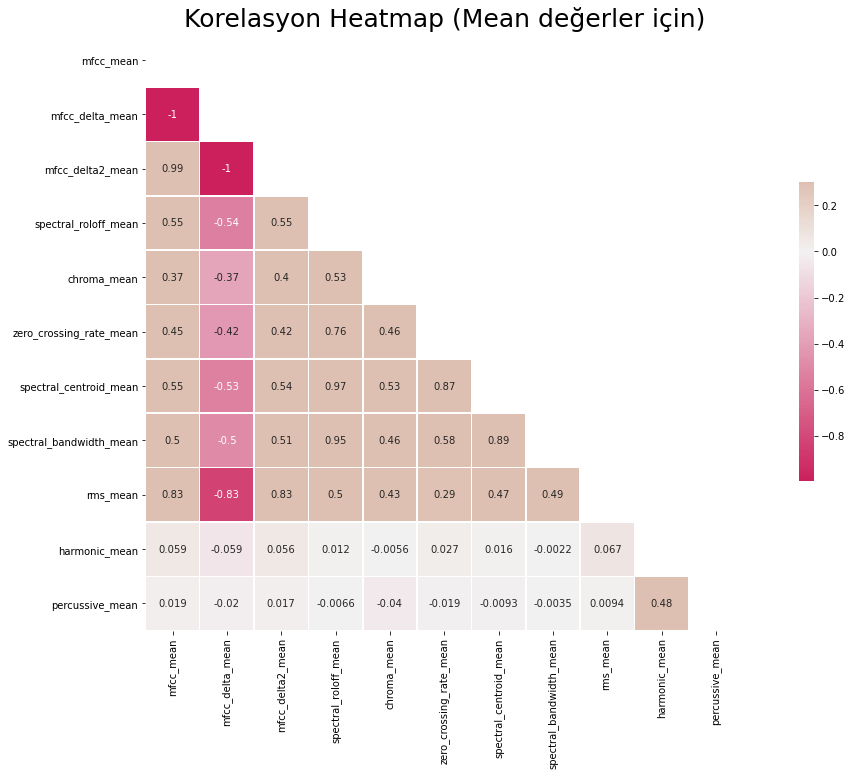

In [5]:
heat_cols = [col for col in df.columns if 'mean' in col]
corr = df[heat_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(20, 11));

cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

plt.title('Korelasyon Heatmap (Mean değerler için)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")


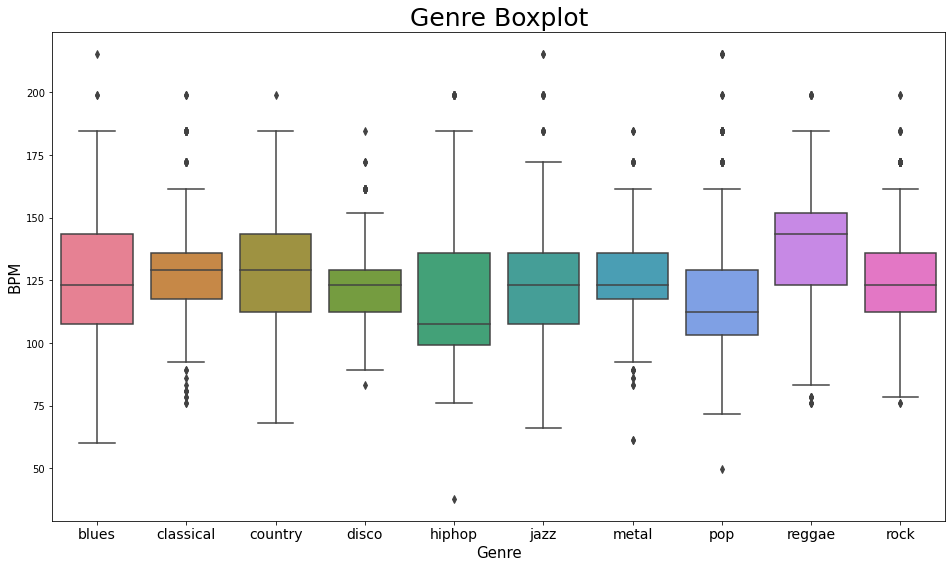

In [6]:
box_data = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = box_data, palette = 'husl');

plt.title('Genre Boxplot', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("Boxplot.jpg")

### Dataların Okunması

In [4]:
data=pd.read_csv("data_extended_3s_final.csv")
df=data.copy()

In [53]:
df.head()

,mfcc_mean,mfcc_delta_mean,mfcc_delta2_mean,spectral_roloff_mean,chroma_mean,zero_crossing_rate_mean,spectral_centroid_mean,spectral_bandwidth_mean,rms_mean,mfcc_var,...,mfcc_min,mfcc_delta_min,mfcc_delta2_min,spectral_roloff_min,spectral_centroid_min,spectral_bandwidth_min,rms_min,tempo,label,genre_number
0,22.090370,-7.219052,6.244784,3714.477539,0.335434,0.083220,1773.285877,1972.723622,0.130405,4642.874512,...,-21.811457,-18.592821,-1.294805,2325.585938,1247.016418,1306.709966,0.026987,129.199219,blues,0
1,20.608259,-6.445150,5.634637,3868.771221,0.343020,0.088209,1816.195860,2009.201575,0.112699,3840.944336,...,-22.542004,-16.764135,-1.436084,2077.954102,1050.451976,1401.298395,0.045014,123.046875,blues,0
2,24.061310,-7.906862,6.472325,3995.568660,0.346838,0.072200,1788.642783,2085.045996,0.132002,5052.176270,...,-16.437555,-19.537317,-1.208574,2594.750977,1018.359322,1356.079275,0.023172,123.046875,blues,0
3,20.899549,-6.724324,5.705623,3566.395358,0.363671,0.070204,1654.902168,1959.202709,0.132562,3901.765137,...,-19.682358,-17.208145,-1.136066,1937.988281,1050.894464,1445.084106,0.034931,123.046875,blues,0
4,21.047384,-6.152433,5.418094,3469.910044,0.335927,0.070899,1630.737017,1948.459295,0.143289,3472.497314,...,-15.617715,-16.125988,-1.081960,1808.789062,1130.987705,1393.102465,0.057246,123.046875,blues,0
